In [180]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

In [181]:
file = Path("Nutrition.csv", encoding='UTF-8')
fdf = pd.read_csv(file)
fdf.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,30.6,30.6,NaN,NaN,29.4,31.8,31255.0,NaN,NaN,NaN,NaN,NaN,Hispanic,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,29.3,29.3,NaN,NaN,25.7,33.3,842.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,28.8,28.8,NaN,NaN,28.1,29.5,62562.0,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.7,32.7,NaN,NaN,31.9,33.5,60069.0,NaN,NaN,NaN,NaN,Data not reported,NaN,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,26.6,26.6,NaN,NaN,25.6,27.6,30904.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [182]:
#Eliminate all irrelevant columns
cleandf = pd.DataFrame().assign(Year=fdf['YearEnd'], LocationDesc=fdf['LocationDesc'], Question=fdf['Question'], Percent_Answered_Yes=fdf['Data_Value'], Sample_Size=fdf['Sample_Size'], Gender=fdf['Gender'])
cleandf.head()

,Year,LocationDesc,Question,Percent_Answered_Yes,Sample_Size,Gender
0,2020,National,Percent of adults who engage in no leisure-tim...,30.6,31255.0,NaN
1,2014,Guam,Percent of adults aged 18 years and older who ...,29.3,842.0,NaN
2,2013,National,Percent of adults aged 18 years and older who ...,28.8,62562.0,NaN
3,2013,National,Percent of adults aged 18 years and older who ...,32.7,60069.0,NaN
4,2015,National,Percent of adults who achieve at least 300 min...,26.6,30904.0,NaN


In [183]:
#Cleaning dataframe to answer questions for sex stratification
q1 = cleandf['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
q2 = cleandf['Question'] == 'Percent of adults aged 18 years and older who have obesity'
cleanq = q1 | q2
cleandf = cleandf[cleanq]
cleandf.head()

,Year,LocationDesc,Question,Percent_Answered_Yes,Sample_Size,Gender
1,2014,Guam,Percent of adults aged 18 years and older who ...,29.3,842.0,NaN
2,2013,National,Percent of adults aged 18 years and older who ...,28.8,62562.0,NaN
7,2012,District of Columbia,Percent of adults aged 18 years and older who ...,31.6,243.0,NaN
9,2011,Alabama,Percent of adults aged 18 years and older who ...,35.2,598.0,NaN
12,2011,National,Percent of adults aged 18 years and older who ...,35.4,6649.0,NaN


In [184]:
f = cleandf['Gender'] == 'Female'
m = cleandf['Gender'] == 'Male'
cleang = f | m
cleandf = cleandf[cleang]
cleandf.head()

,Year,LocationDesc,Question,Percent_Answered_Yes,Sample_Size,Gender
41,2016,New York,Percent of adults aged 18 years and older who ...,25.9,14316.0,Male
51,2016,New Hampshire,Percent of adults aged 18 years and older who ...,26.6,2732.0,Male
64,2015,National,Percent of adults aged 18 years and older who ...,29.1,176407.0,Male
65,2017,Hawaii,Percent of adults aged 18 years and older who ...,25.1,3529.0,Male
97,2016,Oklahoma,Percent of adults aged 18 years and older who ...,33.3,2710.0,Male


In [185]:
cleandf['Count_Answered_Yes'] = round((cleandf['Percent_Answered_Yes']/100)*cleandf['Sample_Size'],0)
cleandf.head()

,Year,LocationDesc,Question,Percent_Answered_Yes,Sample_Size,Gender,Count_Answered_Yes
41,2016,New York,Percent of adults aged 18 years and older who ...,25.9,14316.0,Male,3708.0
51,2016,New Hampshire,Percent of adults aged 18 years and older who ...,26.6,2732.0,Male,727.0
64,2015,National,Percent of adults aged 18 years and older who ...,29.1,176407.0,Male,51334.0
65,2017,Hawaii,Percent of adults aged 18 years and older who ...,25.1,3529.0,Male,886.0
97,2016,Oklahoma,Percent of adults aged 18 years and older who ...,33.3,2710.0,Male,902.0


In [186]:
#Dataframe for Question 1 (female stratification) by year
q1fsummary = pd.DataFrame().assign(Gender=cleandf['Gender'], Question=cleandf['Question'], Year=cleandf['Year'], Total_Count_Answered_Yes=cleandf['Count_Answered_Yes'], Total_Sample_Size=cleandf['Sample_Size'])
q1fsummary = q1fsummary[q1fsummary.Gender == 'Female']
q1fsummary = q1fsummary[q1fsummary.Question == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']
q1fsummary.head()

,Gender,Question,Year,Total_Count_Answered_Yes,Total_Sample_Size
266,Female,Percent of adults who achieve at least 150 min...,2019,673.0,1215.0
6754,Female,Percent of adults who achieve at least 150 min...,2015,110214.0,219988.0
10806,Female,Percent of adults who achieve at least 150 min...,2017,1382.0,2916.0
10962,Female,Percent of adults who achieve at least 150 min...,2017,1469.0,2820.0
11104,Female,Percent of adults who achieve at least 150 min...,2017,2633.0,5532.0


In [187]:
#Summary dataframe for Question 1 (female stratification) by year
q1fyr = q1fsummary.groupby('Year').agg({
    'Total_Count_Answered_Yes': 'sum',
    'Total_Sample_Size': 'sum'
}).reset_index()

q1fyr['Percent_Answered_Yes'] = (q1fyr['Total_Count_Answered_Yes'] / q1fyr['Total_Sample_Size']) * 100
q1fyr['Percent_Answered_Yes'] = q1fyr['Percent_Answered_Yes'].round(2).astype(str) + '%'

q1fyr= q1fyr.sort_values('Year')
print('Total adult females who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity') 
print('or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination):')
display(q1fyr)

Total adult females who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity
or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination):


,Year,Total_Count_Answered_Yes,Total_Sample_Size,Percent_Answered_Yes
0,2011,279010.0,555538.0,50.22%
1,2013,252264.0,511760.0,49.29%
2,2015,223699.0,444101.0,50.37%
3,2017,217443.0,443676.0,49.01%
4,2019,197122.0,397464.0,49.59%


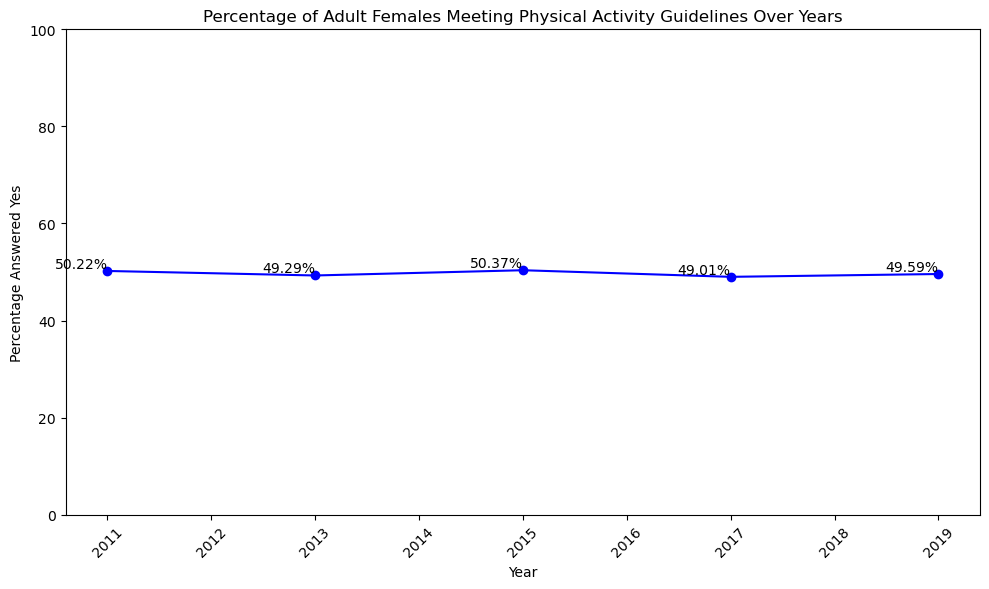

In [188]:
#Summary line graph for Question 1 (female stratification) by year
plt.figure(figsize=(10, 6))

plt.plot(q1fyr['Year'], q1fyr['Percent_Answered_Yes'].str.rstrip('%').astype(float), marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Percentage Answered Yes')
plt.title('Percentage of Adult Females Meeting Physical Activity Guidelines Over Years')
plt.xticks(rotation=45)

plt.ylim(0, 100)

for x, y, percent in zip(q1fyr['Year'], q1fyr['Percent_Answered_Yes'].str.rstrip('%').astype(float), q1fyr['Percent_Answered_Yes']):
    plt.text(x, y, percent, fontsize=10, ha='right', va='bottom')

plt.tight_layout()
plt.show()

In [189]:
#Dataframe for Question 1 (female stratification) by location
q1fsummary = pd.DataFrame().assign(Gender=cleandf['Gender'], Question=cleandf['Question'], Location=cleandf['LocationDesc'], Total_Count_Answered_Yes=cleandf['Count_Answered_Yes'], Total_Sample_Size=cleandf['Sample_Size'])
q1fsummary = q1fsummary[q1fsummary.Gender == 'Female']
q1fsummary = q1fsummary[q1fsummary.Question == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']
q1fsummary.head()

,Gender,Question,Location,Total_Count_Answered_Yes,Total_Sample_Size
266,Female,Percent of adults who achieve at least 150 min...,District of Columbia,673.0,1215.0
6754,Female,Percent of adults who achieve at least 150 min...,National,110214.0,219988.0
10806,Female,Percent of adults who achieve at least 150 min...,West Virginia,1382.0,2916.0
10962,Female,Percent of adults who achieve at least 150 min...,Illinois,1469.0,2820.0
11104,Female,Percent of adults who achieve at least 150 min...,Michigan,2633.0,5532.0


In [190]:
#Summary dataframe for Question 1 (female stratification) by location
q1floc = q1fsummary.groupby('Location').agg({
    'Total_Count_Answered_Yes': 'sum',
    'Total_Sample_Size': 'sum'
}).reset_index()

q1floc['Percent_Answered_Yes'] = ((q1floc['Total_Count_Answered_Yes'] / q1floc['Total_Sample_Size']) * 100)
q1floc['Percent_Answered_Yes'] = q1floc['Percent_Answered_Yes'].round(2).astype(str) + '%'

q1floc= q1floc.sort_values('Location')
print('Total adult females who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity') 
print('or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination):')
display(q1floc)

Total adult females who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity
or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination):


,Location,Total_Count_Answered_Yes,Total_Sample_Size,Percent_Answered_Yes
0,Alabama,8384.0,20216.0,41.47%
1,Alaska,4940.0,8578.0,57.59%
2,Arizona,11205.0,21603.0,51.87%
3,Arkansas,5927.0,14265.0,41.55%
4,California,17185.0,30332.0,56.66%
5,Colorado,17455.0,28968.0,60.26%
6,Connecticut,11973.0,23388.0,51.19%
7,Delaware,5473.0,11631.0,47.06%
8,District of Columbia,5788.0,10640.0,54.4%
9,Florida,23860.0,48244.0,49.46%


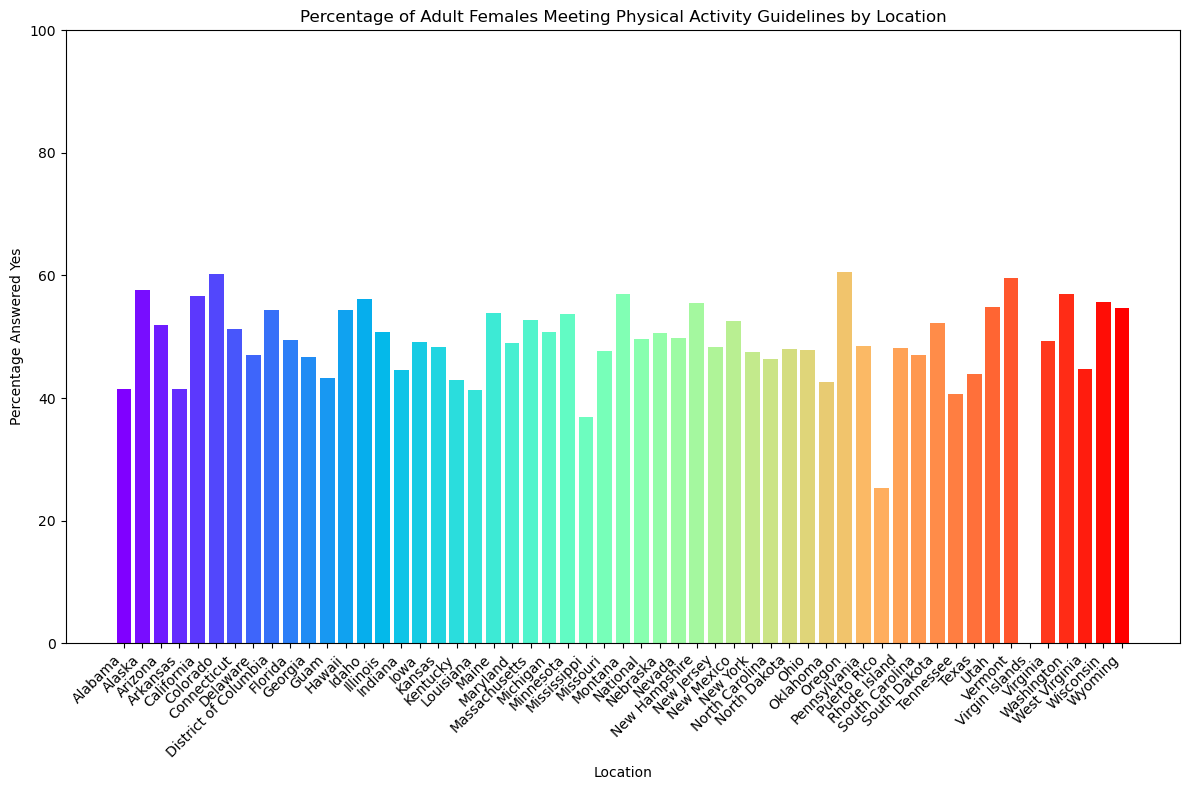

In [280]:
#Summary bar graph for Question 1 (female stratification) by location
plt.figure(figsize=(12, 8))

colors = plt.cm.rainbow(np.linspace(0, 1, len(q1floc['Location'])))

bars = plt.bar(q1floc['Location'], q1floc['Percent_Answered_Yes'].str.rstrip('%').astype(float), color=colors, width=0.8)
plt.xlabel('Location')
plt.ylabel('Percentage Answered Yes')
plt.title('Percentage of Adult Females Meeting Physical Activity Guidelines by Location')
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [192]:
#Dataframe for Question 2 (female stratification) by year
q2fsummary = pd.DataFrame().assign(Gender=cleandf['Gender'], Question=cleandf['Question'], Year=cleandf['Year'], Total_Count_Answered_Yes=cleandf['Count_Answered_Yes'], Total_Sample_Size=cleandf['Sample_Size'])
q2fsummary = q2fsummary[q2fsummary.Gender == 'Female']
q2fsummary = q2fsummary[q2fsummary.Question == 'Percent of adults aged 18 years and older who have obesity']
q2fsummary.head()

,Gender,Question,Year,Total_Count_Answered_Yes,Total_Sample_Size
103,Female,Percent of adults aged 18 years and older who ...,2016,4933.0,18545.0
177,Female,Percent of adults aged 18 years and older who ...,2016,1204.0,3739.0
206,Female,Percent of adults aged 18 years and older who ...,2016,750.0,2507.0
771,Female,Percent of adults aged 18 years and older who ...,2018,874.0,2839.0
856,Female,Percent of adults aged 18 years and older who ...,2018,1144.0,3205.0


In [193]:
#Summary dataframe for Question 2 (female stratification) by year
q2fyr = q2fsummary.groupby('Year').agg({
    'Total_Count_Answered_Yes': 'sum',
    'Total_Sample_Size': 'sum'
}).reset_index()

q2fyr['Percent_Answered_Yes'] = (q2fyr['Total_Count_Answered_Yes'] / q2fyr['Total_Sample_Size']) * 100
q2fyr['Percent_Answered_Yes'] = ((q2fyr['Total_Count_Answered_Yes'] / q2fyr['Total_Sample_Size']) * 100).round(2).astype(str) + '%'

q2fyr= q2fyr.sort_values('Year')

print('Percent of adult females aged 18 years and older who have obesity:')
display(q2fyr)

Percent of adult females aged 18 years and older who have obesity:


,Year,Total_Count_Answered_Yes,Total_Sample_Size,Percent_Answered_Yes
0,2011,150930.0,557424.0,27.08%
1,2012,141356.0,514380.0,27.48%
2,2013,149461.0,530165.0,28.19%
3,2014,140939.0,489256.0,28.81%
4,2015,128211.0,447885.0,28.63%
5,2016,142378.0,484963.0,29.36%
6,2017,133868.0,444529.0,30.11%
7,2018,132032.0,421798.0,31.3%
8,2019,128559.0,399615.0,32.17%
9,2020,119449.0,372671.0,32.05%


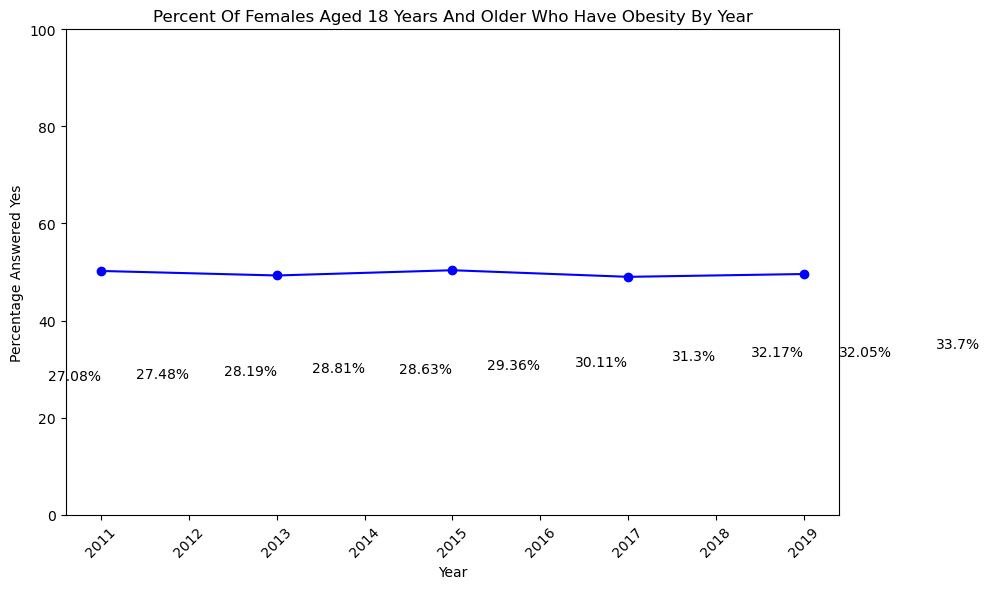

In [206]:
#Summary line graph for Question 2 (female stratification) by year
plt.figure(figsize=(10, 6))

plt.plot(q1fyr['Year'], q1fyr['Percent_Answered_Yes'].str.rstrip('%').astype(float), marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Percentage Answered Yes')
plt.title('Percent Of Females Aged 18 Years And Older Who Have Obesity By Year')
plt.xticks(rotation=45)

plt.ylim(0, 100)

for x, y, percent in zip(q2fyr['Year'], q2fyr['Percent_Answered_Yes'].str.rstrip('%').astype(float), q2fyr['Percent_Answered_Yes']):
    plt.text(x, y, percent, fontsize=10, ha='right', va='bottom')

plt.tight_layout()
plt.show()

In [194]:
#Dataframe for Question 2 (female stratification) by location
q2fsummary = pd.DataFrame().assign(Gender=cleandf['Gender'], Question=cleandf['Question'], Location=cleandf['LocationDesc'], Total_Count_Answered_Yes=cleandf['Count_Answered_Yes'], Total_Sample_Size=cleandf['Sample_Size'])
q2fsummary = q2fsummary[q2fsummary.Gender == 'Female']
q2fsummary = q2fsummary[q2fsummary.Question == 'Percent of adults aged 18 years and older who have obesity']
q2fsummary.head()

,Gender,Question,Location,Total_Count_Answered_Yes,Total_Sample_Size
103,Female,Percent of adults aged 18 years and older who ...,Florida,4933.0,18545.0
177,Female,Percent of adults aged 18 years and older who ...,Oklahoma,1204.0,3739.0
206,Female,Percent of adults aged 18 years and older who ...,Wisconsin,750.0,2507.0
771,Female,Percent of adults aged 18 years and older who ...,Oregon,874.0,2839.0
856,Female,Percent of adults aged 18 years and older who ...,Missouri,1144.0,3205.0


In [195]:
#Summary dataframe for Question 2 (female stratification) by location
q2floc = q2fsummary.groupby('Location').agg({
    'Total_Count_Answered_Yes': 'sum',
    'Total_Sample_Size': 'sum'
}).reset_index()

q2floc['Percent_Answered_Yes'] = (q2floc['Total_Count_Answered_Yes'] / q2floc['Total_Sample_Size']) * 100
q2floc['Percent_Answered_Yes'] = q2floc['Percent_Answered_Yes'].round(2).astype(str) + '%'

q2floc= q2floc.sort_values('Location')

print('Percent of adult females aged 18 years and older who have obesity:')
display(q2floc)

Percent of adult females aged 18 years and older who have obesity:


,Location,Total_Count_Answered_Yes,Total_Sample_Size,Percent_Answered_Yes
0,Alabama,15717.0,44138.0,35.61%
1,Alaska,5921.0,19735.0,30.0%
2,Arizona,15283.0,53242.0,28.7%
3,Arkansas,11767.0,32134.0,36.62%
4,California,14646.0,58062.0,25.22%
5,Colorado,13939.0,63329.0,22.01%
6,Connecticut,13099.0,50624.0,25.88%
7,Delaware,7910.0,24778.0,31.92%
8,District of Columbia,6129.0,22864.0,26.81%
9,Florida,24345.0,91561.0,26.59%


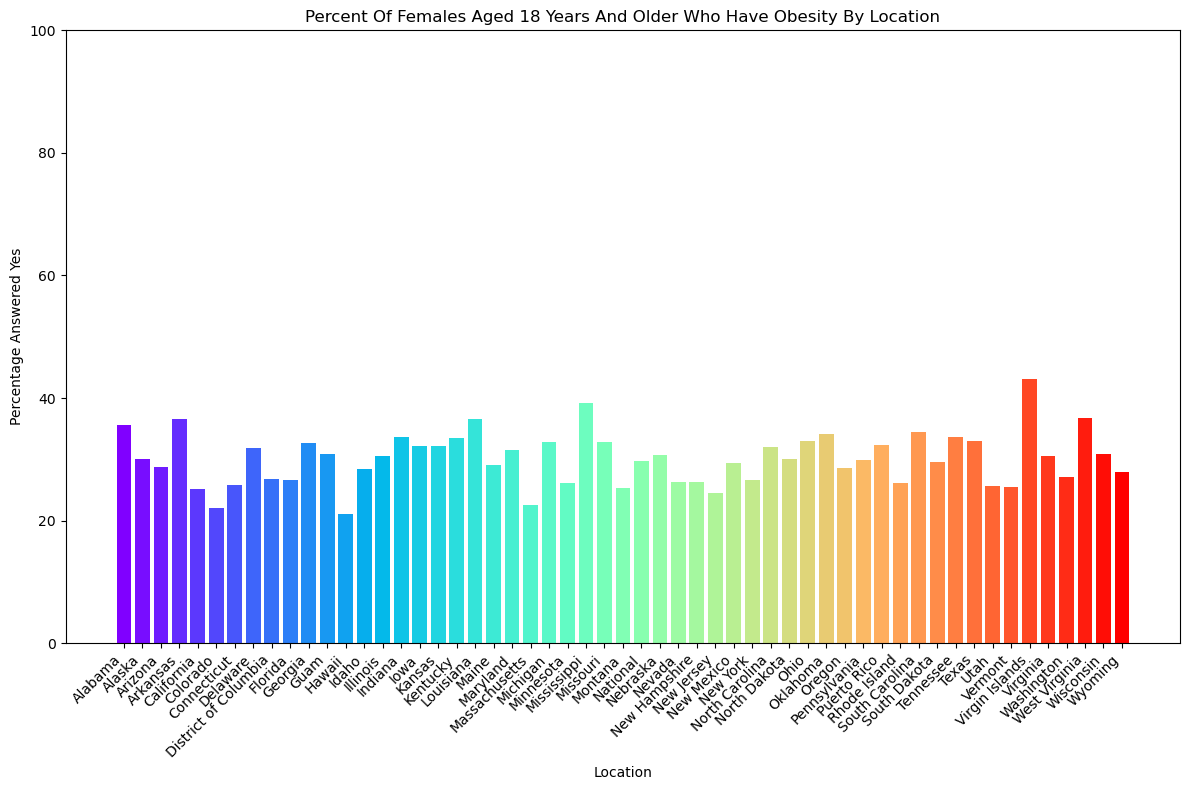

In [279]:
#Summary bar graph for Question 2 (female stratification) by location
plt.figure(figsize=(12, 8))

colors = plt.cm.rainbow(np.linspace(0, 1, len(q1floc['Location'])))

bars = plt.bar(q2floc['Location'], q2floc['Percent_Answered_Yes'].str.rstrip('%').astype(float), color=colors, width=0.8)
plt.xlabel('Location')
plt.ylabel('Percentage Answered Yes')
plt.title('Percent Of Females Aged 18 Years And Older Who Have Obesity By Location')
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [196]:
#Summary dataframe for Question 1 (male stratification) by year
q1msummary = pd.DataFrame().assign(Gender=cleandf['Gender'], Question=cleandf['Question'], Year=cleandf['Year'], Total_Count_Answered_Yes=cleandf['Count_Answered_Yes'], Total_Sample_Size=cleandf['Sample_Size'])
q1msummary = q1msummary[q1msummary.Gender == 'Male']
q1msummary = q1msummary[q1msummary.Question == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']
q1msummary.head()

,Gender,Question,Year,Total_Count_Answered_Yes,Total_Sample_Size
2517,Male,Percent of adults who achieve at least 150 min...,2015,368.0,691.0
5770,Male,Percent of adults who achieve at least 150 min...,2015,83654.0,161495.0
7743,Male,Percent of adults who achieve at least 150 min...,2017,2412.0,4516.0
9404,Male,Percent of adults who achieve at least 150 min...,2015,723.0,1897.0
10744,Male,Percent of adults who achieve at least 150 min...,2017,1089.0,2278.0


In [197]:
q1myr = q1msummary.groupby('Year').agg({
    'Total_Count_Answered_Yes': 'sum',
    'Total_Sample_Size': 'sum'
}).reset_index()

q1myr['Percent_Answered_Yes'] = (q1myr['Total_Count_Answered_Yes'] / q1myr['Total_Sample_Size']) * 100
q1myr['Percent_Answered_Yes'] = ((q1myr['Total_Count_Answered_Yes'] / q1myr['Total_Sample_Size']) * 100).round(2).astype(str) + '%'

q1myr= q1myr.sort_values('Year')

print('Total adult males who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity') 
print('or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination):')
display(q1myr)

Total adult males who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity
or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination):


,Year,Total_Count_Answered_Yes,Total_Sample_Size,Percent_Answered_Yes
0,2011,190733.0,360638.0,52.89%
1,2013,183722.0,354402.0,51.84%
2,2015,169860.0,325578.0,52.17%
3,2017,180875.0,351333.0,51.48%
4,2019,176413.0,329956.0,53.47%


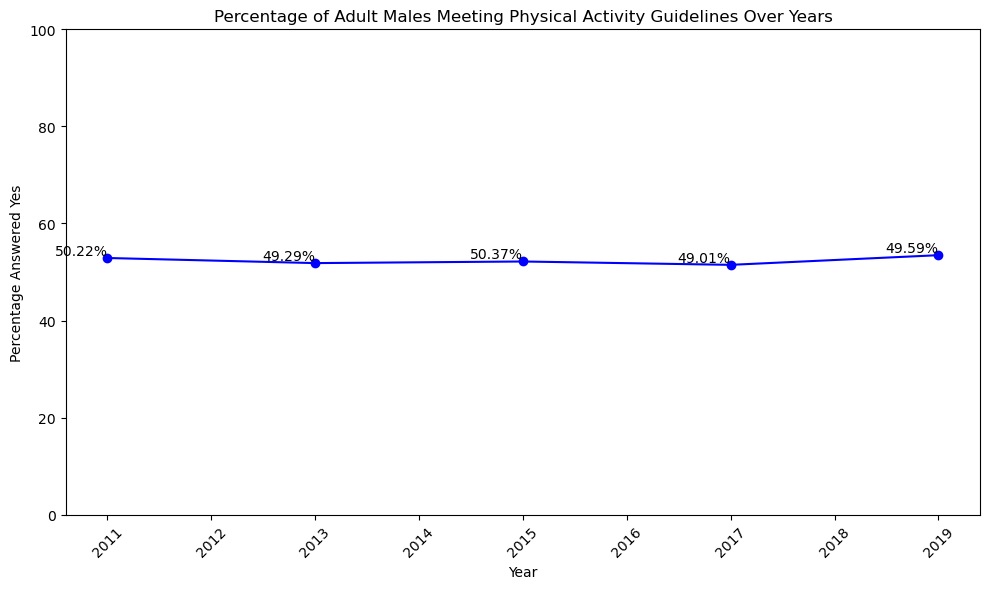

In [208]:
plt.figure(figsize=(10, 6))

plt.plot(q1myr['Year'], q1myr['Percent_Answered_Yes'].str.rstrip('%').astype(float), marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Percentage Answered Yes')
plt.title('Percentage of Adult Males Meeting Physical Activity Guidelines Over Years')
plt.xticks(rotation=45)

plt.ylim(0, 100)

for x, y, percent in zip(q1myr['Year'], q1myr['Percent_Answered_Yes'].str.rstrip('%').astype(float), q1fyr['Percent_Answered_Yes']):
    plt.text(x, y, percent, fontsize=10, ha='right', va='bottom')

plt.tight_layout()
plt.show()

In [198]:
#Summary dataframe for Question 1 (male stratificiation) by location
q1msummary = pd.DataFrame().assign(Gender=cleandf['Gender'], Question=cleandf['Question'], Location=cleandf['LocationDesc'], Total_Count_Answered_Yes=cleandf['Count_Answered_Yes'], Total_Sample_Size=cleandf['Sample_Size'])
q1msummary = q1msummary[q1msummary.Gender == 'Male']
q1msummary = q1msummary[q1msummary.Question == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']
q1msummary.head()

,Gender,Question,Location,Total_Count_Answered_Yes,Total_Sample_Size
2517,Male,Percent of adults who achieve at least 150 min...,Guam,368.0,691.0
5770,Male,Percent of adults who achieve at least 150 min...,National,83654.0,161495.0
7743,Male,Percent of adults who achieve at least 150 min...,Utah,2412.0,4516.0
9404,Male,Percent of adults who achieve at least 150 min...,Puerto Rico,723.0,1897.0
10744,Male,Percent of adults who achieve at least 150 min...,Georgia,1089.0,2278.0


In [199]:
q1mloc = q1msummary.groupby('Location').agg({
    'Total_Count_Answered_Yes': 'sum',
    'Total_Sample_Size': 'sum'
}).reset_index()

q1mloc['Percent_Answered_Yes'] = (q1mloc['Total_Count_Answered_Yes'] / q1mloc['Total_Sample_Size']) * 100
q1mloc['Percent_Answered_Yes'] = q1mloc['Percent_Answered_Yes'].round(2).astype(str) + '%'

q1mloc= q1mloc.sort_values('Location')

print('Total adult males who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity') 
print('or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination):')
display(q1mloc)

Total adult males who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity
or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination):


,Location,Total_Count_Answered_Yes,Total_Sample_Size,Percent_Answered_Yes
0,Alabama,5682.0,12073.0,47.06%
1,Alaska,4310.0,7559.0,57.02%
2,Arizona,8905.0,16286.0,54.68%
3,Arkansas,4133.0,8558.0,48.29%
4,California,14548.0,25380.0,57.32%
5,Colorado,14087.0,23295.0,60.47%
6,Connecticut,9508.0,17305.0,54.94%
7,Delaware,4227.0,8298.0,50.94%
8,District of Columbia,4148.0,7308.0,56.76%
9,Florida,18388.0,34355.0,53.52%


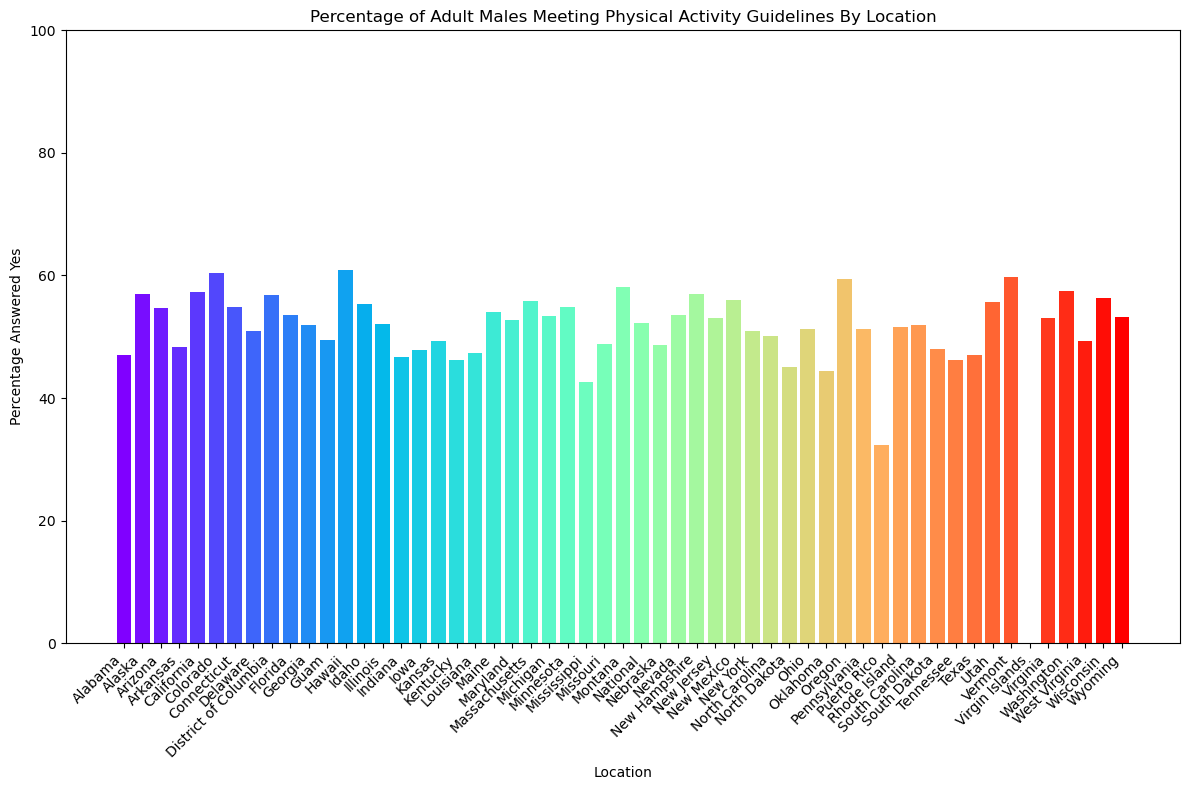

In [278]:
plt.figure(figsize=(12, 8))

colors = plt.cm.rainbow(np.linspace(0, 1, len(q1mloc['Location'])))

bars = plt.bar(q1mloc['Location'], q1mloc['Percent_Answered_Yes'].str.rstrip('%').astype(float), color=colors, width=0.8)
plt.xlabel('Location')
plt.ylabel('Percentage Answered Yes')
plt.title('Percentage of Adult Males Meeting Physical Activity Guidelines By Location')
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [200]:
#Summary dataframe for Question 2 (male stratification) by year
q2msummary = pd.DataFrame().assign(Gender=cleandf['Gender'], Question=cleandf['Question'], Year=cleandf['Year'], Total_Count_Answered_Yes=cleandf['Count_Answered_Yes'], Total_Sample_Size=cleandf['Sample_Size'])
q2msummary = q2msummary[q2msummary.Gender == 'Male']
q2msummary = q2msummary[q2msummary.Question == 'Percent of adults aged 18 years and older who have obesity']
q2msummary.head()

,Gender,Question,Year,Total_Count_Answered_Yes,Total_Sample_Size
41,Male,Percent of adults aged 18 years and older who ...,2016,3708.0,14316.0
51,Male,Percent of adults aged 18 years and older who ...,2016,727.0,2732.0
64,Male,Percent of adults aged 18 years and older who ...,2015,51334.0,176407.0
65,Male,Percent of adults aged 18 years and older who ...,2017,886.0,3529.0
97,Male,Percent of adults aged 18 years and older who ...,2016,902.0,2710.0


In [201]:
q2myr = q2msummary.groupby('Year').agg({
    'Total_Count_Answered_Yes': 'sum',
    'Total_Sample_Size': 'sum'
}).reset_index()

q2myr['Percent_Answered_Yes'] = (q2myr['Total_Count_Answered_Yes'] / q2myr['Total_Sample_Size']) * 100
q2myr['Percent_Answered_Yes'] = ((q2myr['Total_Count_Answered_Yes'] / q2myr['Total_Sample_Size']) * 100).round(2).astype(str) + '%'

q2myr= q2myr.sort_values('Year')

print('Total adult males aged 18 years and older who have obesity:')
display(q2myr)

Total adult males aged 18 years and older who have obesity:


,Year,Total_Count_Answered_Yes,Total_Sample_Size,Percent_Answered_Yes
0,2011,106816.0,383976.0,27.82%
1,2012,103792.0,370080.0,28.05%
2,2013,111066.0,390571.0,28.44%
3,2014,107969.0,370589.0,29.13%
4,2015,104122.0,355489.0,29.29%
5,2016,118137.0,400125.0,29.53%
6,2017,114968.0,377651.0,30.44%
7,2018,115208.0,374932.0,30.73%
8,2019,110431.0,356523.0,30.97%
9,2020,108147.0,341771.0,31.64%


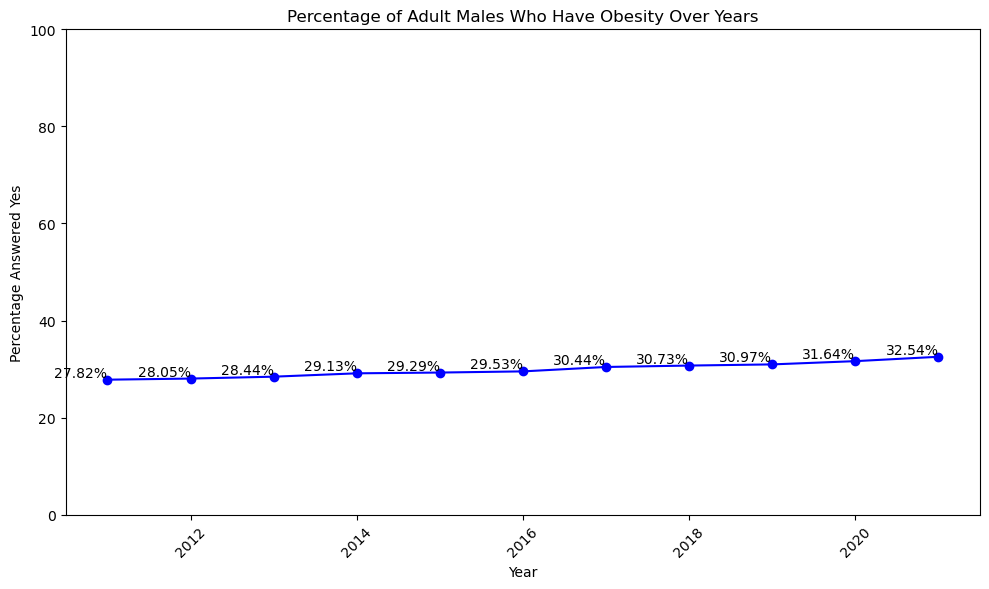

In [213]:
plt.figure(figsize=(10, 6))

plt.plot(q2myr['Year'], q2myr['Percent_Answered_Yes'].str.rstrip('%').astype(float), marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Percentage Answered Yes')
plt.title('Percentage of Adult Males Who Have Obesity Over Years')
plt.xticks(rotation=45)

plt.ylim(0, 100)

for x, y, percent in zip(q2myr['Year'], q2myr['Percent_Answered_Yes'].str.rstrip('%').astype(float), q2myr['Percent_Answered_Yes']):
    plt.text(x, y, percent, fontsize=10, ha='right', va='bottom')

plt.tight_layout()
plt.show()

In [202]:
#Summary dataframe for Question 2 (male stratification) by location
q2msummary = pd.DataFrame().assign(Gender=cleandf['Gender'], Question=cleandf['Question'], Location=cleandf['LocationDesc'], Total_Count_Answered_Yes=cleandf['Count_Answered_Yes'], Total_Sample_Size=cleandf['Sample_Size'])
q2msummary = q2msummary[q2msummary.Gender == 'Male']
q2msummary = q2msummary[q2msummary.Question == 'Percent of adults aged 18 years and older who have obesity']
q2msummary.head()

,Gender,Question,Location,Total_Count_Answered_Yes,Total_Sample_Size
41,Male,Percent of adults aged 18 years and older who ...,New York,3708.0,14316.0
51,Male,Percent of adults aged 18 years and older who ...,New Hampshire,727.0,2732.0
64,Male,Percent of adults aged 18 years and older who ...,National,51334.0,176407.0
65,Male,Percent of adults aged 18 years and older who ...,Hawaii,886.0,3529.0
97,Male,Percent of adults aged 18 years and older who ...,Oklahoma,902.0,2710.0


In [203]:
q2mloc = q2msummary.groupby('Location').agg({
    'Total_Count_Answered_Yes': 'sum',
    'Total_Sample_Size': 'sum'
}).reset_index()

q2mloc['Percent_Answered_Yes'] = (q2mloc['Total_Count_Answered_Yes'] / q2mloc['Total_Sample_Size']) * 100
q2mloc['Percent_Answered_Yes'] = q2mloc['Percent_Answered_Yes'].round(2).astype(str) + '%'

q2mloc= q2mloc.sort_values('Location')

print('Total adult males aged 18 years and older who have obesity:')
display(q2mloc)

Total adult males aged 18 years and older who have obesity:


,Location,Total_Count_Answered_Yes,Total_Sample_Size,Percent_Answered_Yes
0,Alabama,9776.0,28287.0,34.56%
1,Alaska,5779.0,19108.0,30.24%
2,Arizona,12855.0,43531.0,29.53%
3,Arkansas,7306.0,21154.0,34.54%
4,California,13431.0,53552.0,25.08%
5,Colorado,12607.0,57040.0,22.1%
6,Connecticut,11660.0,42017.0,27.75%
7,Delaware,5984.0,19375.0,30.89%
8,District of Columbia,3314.0,17250.0,19.21%
9,Florida,19948.0,70763.0,28.19%


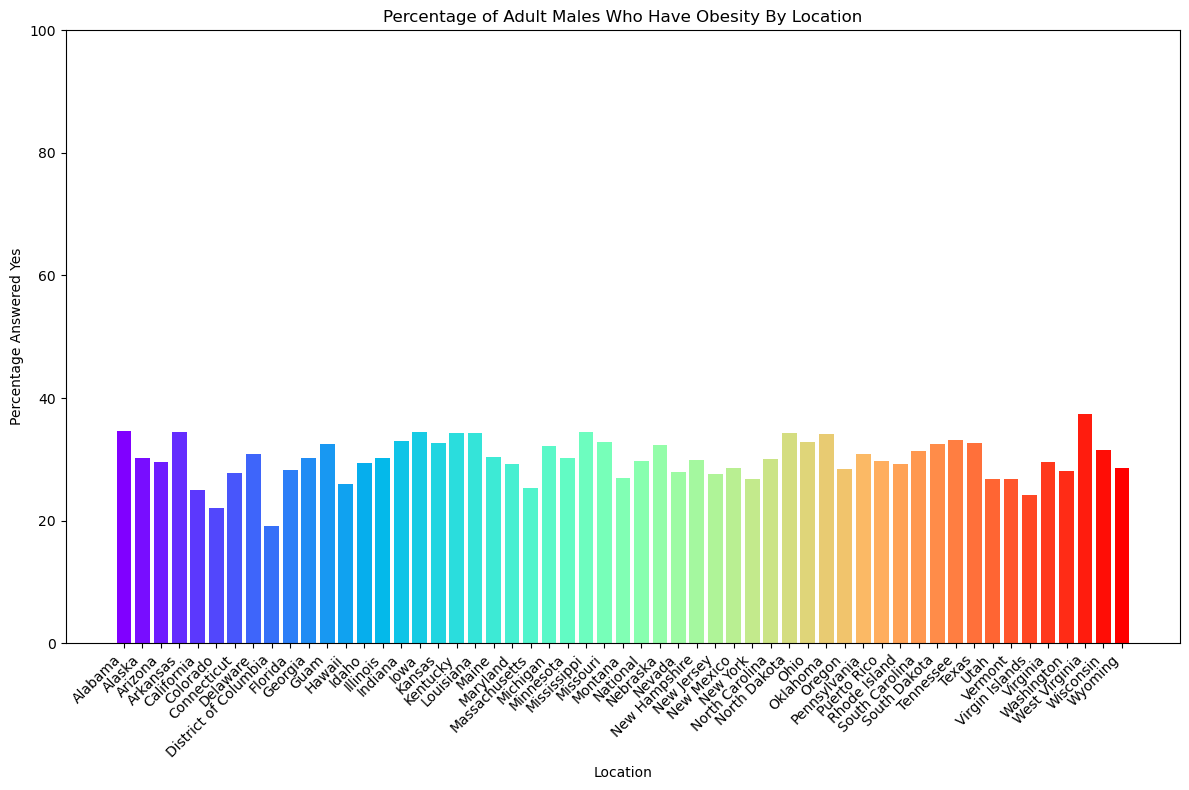

In [277]:
plt.figure(figsize=(12, 8))

colors = plt.cm.rainbow(np.linspace(0, 1, len(q2mloc['Location'])))

bars = plt.bar(q2mloc['Location'], q2mloc['Percent_Answered_Yes'].str.rstrip('%').astype(float), color=colors, width=0.8)
plt.xlabel('Location')
plt.ylabel('Percentage Answered Yes')
plt.title('Percentage of Adult Males Who Have Obesity By Location')
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 100)

plt.tight_layout()
plt.show()

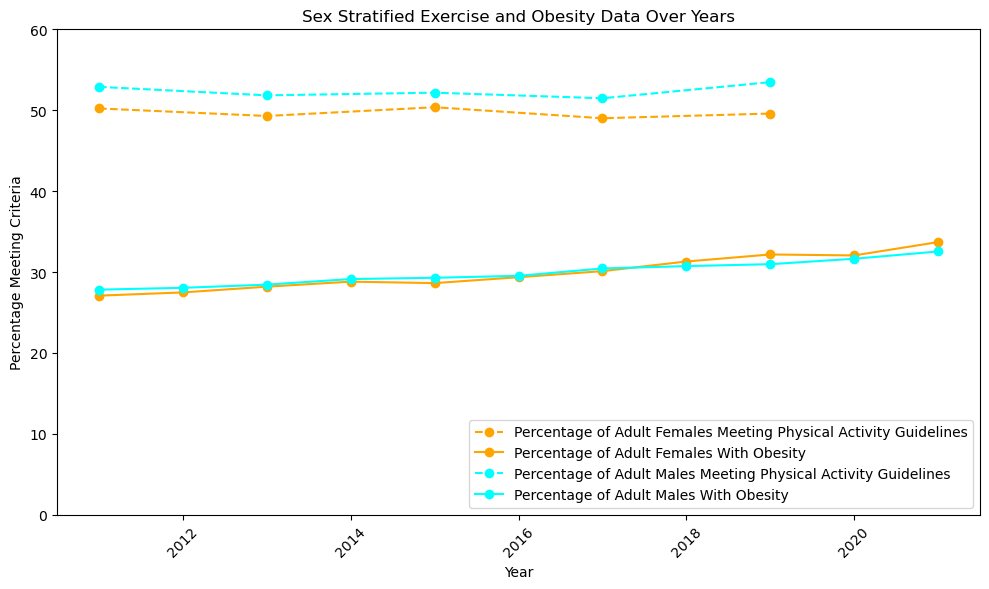

In [248]:
#Combining data tables "Over Years" to compare results for final presentation
plt.figure(figsize=(10, 6))

line1 = plt.plot(q1fyr['Year'], q1fyr['Percent_Answered_Yes'].str.rstrip('%').astype(float), marker='o', linestyle='--', color='orange', 
                 label='Percentage of Adult Females Meeting Physical Activity Guidelines')
line2 = plt.plot(q2fyr['Year'], q2fyr['Percent_Answered_Yes'].str.rstrip('%').astype(float), marker='o', linestyle='-', color='orange',
                 label='Percentage of Adult Females With Obesity')
line3 = plt.plot(q1myr['Year'], q1myr['Percent_Answered_Yes'].str.rstrip('%').astype(float), marker='o', linestyle='--', color='aqua',
                 label='Percentage of Adult Males Meeting Physical Activity Guidelines')
line4 = plt.plot(q2myr['Year'], q2myr['Percent_Answered_Yes'].str.rstrip('%').astype(float), marker='o', linestyle='-', color='aqua',
                 label='Percentage of Adult Males With Obesity')
plt.xlabel('Year')
plt.ylabel('Percentage Meeting Criteria')
plt.title('Sex Stratified Exercise and Obesity Data Over Years')
plt.xticks(rotation=45)

plt.ylim(0, 60)

plt.legend(loc='lower right')

plt.tight_layout()
plt.show()